In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from nfa_lib import ddict2dict
from matplotlib.ticker import FuncFormatter
import math


In [2]:
results = []
for prefix in [".", "1", "2", "3"]:
    with open(f"{prefix}/large_error_stats.pkl", "rb") as fd:
        results += pickle.load(fd)

In [3]:
df = pd.DataFrame(results)

In [4]:
df["transtr"] = df.transitions.map(lambda x: str(ddict2dict(x)))
df["rel_error"] = abs(df.estimate - df.bruteforce)/df.bruteforce
df.drop_duplicates(
    subset=["kappa_multiple", "transtr", "string_len", "bruteforce"],
    inplace=True)
for name, group in df.sort_values(by="kappa_multiple").groupby(["transtr", "string_len"]):
    first = group.iloc[0].rel_error
    df.loc[group.index, "dif_rel_error"] = group.rel_error / first
    

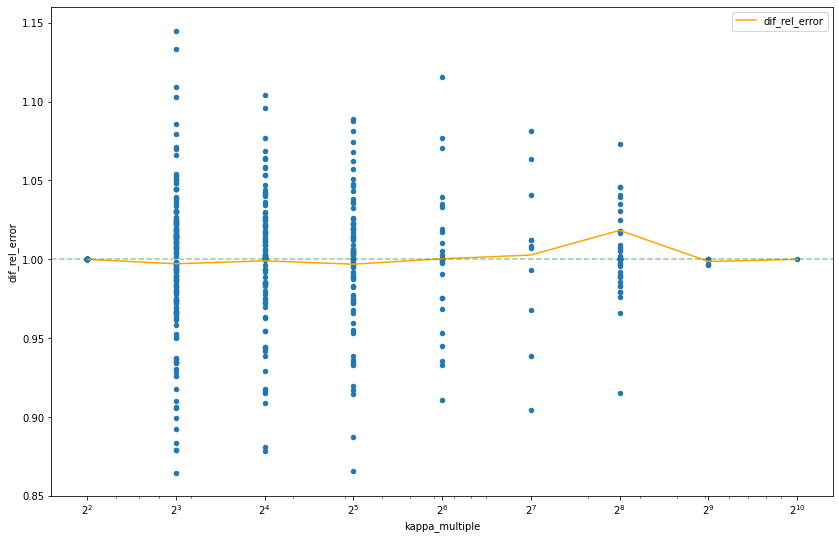

In [9]:
ax = df[["kappa_multiple", "dif_rel_error"]].plot.scatter(
    x="kappa_multiple", y="dif_rel_error", logx=True, figsize=(14,9)
)
df[["kappa_multiple", "dif_rel_error"]].groupby(
    "kappa_multiple"
).dif_rel_error.mean().to_frame().plot(ax=ax, c="orange")
plt.axhline(y=1, c="g", linestyle="--", alpha=0.4)
ax.set_xticks(sorted(df.kappa_multiple.unique()))
ax.set_ylim([0.85, 1.16])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: "$2^{" + str(int(math.log(x,2))) + "}$"))


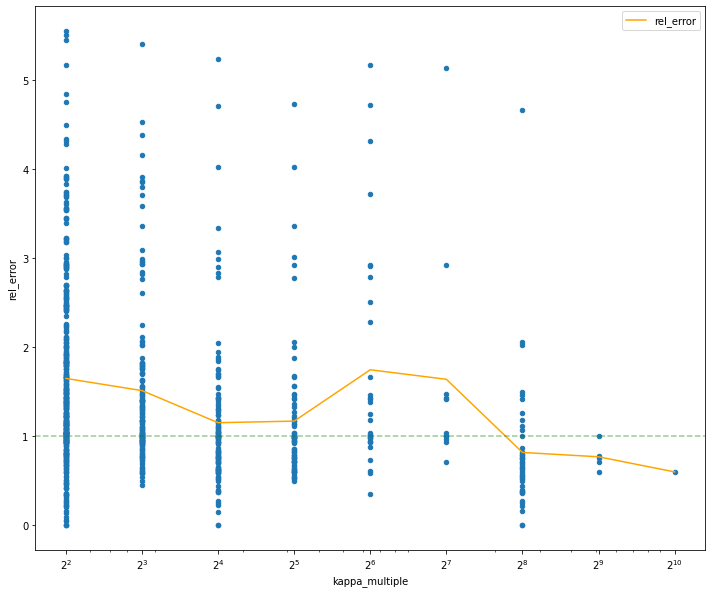

In [7]:
ax = df[["kappa_multiple", "rel_error"]].plot.scatter(
    x="kappa_multiple", y="rel_error", logx=True, figsize=(12,10)
)
df[["kappa_multiple", "rel_error"]].groupby(
    "kappa_multiple"
).rel_error.mean().to_frame().plot(ax=ax, c="orange")
plt.axhline(y=1, c="g", linestyle="--", alpha=0.4)
ax.set_xticks(sorted(df.kappa_multiple.unique()))
#ax.set_ylim([0.85, 1.16])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: "$2^{" + str(int(math.log(x,2))) + "}$"))

In [183]:
df.time.sum()/86400

7.486296680864912

In [151]:
for row in df.itertuples():
    for row_2 in df.itertuples():
        if row.transtr == row_2.transtr:
            continue
        assert row.transitions != row_2.transitions

In [184]:
df[df.kappa_multiple >= 256].sort_values(by="transtr").drop(columns=["transtr"])

,n_states,initial_states,final_states,transitions,string_len,bruteforce,estimate,kappa_multiple,time,rel_error,dif_rel_error
118,6,{q3},"{q2, q3}","{'q0': {'0': {'q0', 'q2', 'q3'}, '1': {'q1'}},...",4,16,25.170639,256,2538.037946,0.573165,0.915581
148,6,"{q1, q2}","{q1, q5, q2}","{'q0': {'0': {'q0', 'q3'}, '1': {'q1', 'q3'}},...",4,11,17.121454,256,1188.646638,0.556496,1.016908
125,6,"{q5, q4, q3}","{q1, q2, q0}","{'q0': {'0': {'q0', 'q3'}}, 'q1': {'0': {'q5',...",4,16,22.380234,256,1646.461304,0.398765,1.017987
869,5,"{q1, q2, q0}","{q1, q4, q0}","{'q0': {'0': {'q1', 'q0'}, '1': {'q1', 'q4', '...",5,32,69.850735,256,7530.635643,1.182835,0.999514
124,6,{q5},{q5},"{'q0': {'0': {'q1', 'q2'}, '1': {'q5', 'q4', '...",4,15,19.165966,256,1927.721577,0.277731,1.006279
137,6,{q1},{q0},"{'q0': {'0': {'q1', 'q3'}}, 'q1': {'1': {'q3',...",4,8,9.256247,256,1816.702086,0.157031,1.046021
154,8,{q0},{q7},"{'q0': {'0': {'q1', 'q5', 'q0'}, '1': {'q2'}},...",4,8,24.165623,256,5050.468180,2.020703,1.040814
129,6,{q0},{q5},"{'q0': {'0': {'q1', 'q5', 'q3'}}, 'q1': {'0': ...",4,8,13.976379,256,1950.588600,0.747047,0.979282
147,6,{q3},"{q1, q5, q2, q4, q0}","{'q0': {'0': {'q1'}, '1': {'q3'}}, 'q1': {'0':...",4,11,17.125567,256,1295.369294,0.556870,1.072910
128,7,{q2},{q2},"{'q0': {'0': {'q2', 'q0'}, '1': {'q4', 'q6'}},...",4,16,22.989049,256,3639.066931,0.436816,0.983075


<AxesSubplot:xlabel='kappa_multiple'>

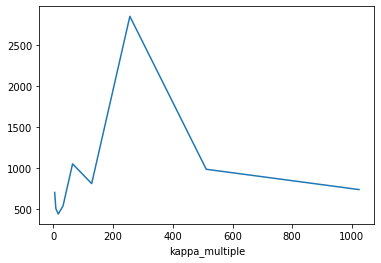

In [171]:
df.groupby(["kappa_multiple"]).time.mean().plot()